In [29]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
n_customers = 500
# first_names = ['James', 'Mary', 'John', 'Patricia', 'Robert', 'Jennifer', 
#                'Michael', 'Linda', 'William', 'Elizabeth', 'David', 'Susan',
#                'Richard', 'Jessica', 'Joseph', 'Sarah', 'Thomas', 'Karen',
#                'Charles', 'Nancy', 'Christopher', 'Lisa', 'Daniel', 'Margaret']
 
# last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia',
#               'Miller', 'Davis', 'Rodriguez', 'Martinez', 'Hernandez', 'Lopez',
#               'Gonzalez', 'Wilson', 'Anderson', 'Thomas', 'Taylor', 'Moore',
#               'Jackson', 'Martin', 'Lee', 'Perez', 'Thompson', 'White']
data = {
    # 'first_name': np.random.choice(first_names, n_customers),
    # 'last_name' : np.random.choice(last_names, n_customers),
    'age': np.random.randint(18, 70, n_customers),
    # 'annual_income': np.random.random_sample(500)*1000,
    'spending_score': np.random.randint(1, 100, n_customers),
}
 
df = pd.DataFrame(data)
print(df)

     age  spending_score
0     56              16
1     69              61
2     46              64
3     32              63
4     60              69
..   ...             ...
495   65              84
496   42              25
497   57              68
498   62              10
499   18              67

[500 rows x 2 columns]


In [30]:
df.to_csv('customer_data.csv', index=False)


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
 
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
print(labels)
centroids = kmeans.cluster_centers_
print(centroids)
centroids_original = scaler.inverse_transform(centroids)
print(centroids_original)
df['cluster']=labels
 
cluster_names = {}
 
for i, c in enumerate(centroids_original):
    age, spending_score = c
 
    if age < 31 and spending_score < 50:
        cluster_names[i] = "Young Low Income"
    elif age < 31 and spending_score >= 50:
        cluster_names[i] = "Young High Income"
    elif age >= 30 and spending_score < 50:
        cluster_names[i] = "Old Low Income"
    elif age >= 30 and spending_score >= 50:
        cluster_names[i] = "Old High Income"
 
df['cluster_name'] = df['cluster'].map(cluster_names)
print(df)
 
print(df['cluster'].value_counts())

[0 1 1 2 1 3 2 1 2 3 3 3 2 1 0 2 2 2 3 2 1 1 1 3 2 1 3 2 0 3 1 0 0 1 3 3 1
 0 0 1 2 0 1 3 3 3 1 3 2 3 2 1 3 0 3 3 0 0 2 1 3 0 1 2 3 0 1 0 3 3 3 0 2 0
 3 0 1 1 2 0 2 0 1 2 3 3 2 1 2 3 0 2 0 3 0 2 0 1 1 3 1 3 2 2 3 3 2 1 3 0 2
 0 3 2 1 0 0 2 1 1 1 0 2 3 3 3 1 0 1 3 2 0 1 1 1 2 0 1 2 0 0 1 2 3 3 3 1 3
 1 0 2 3 3 2 0 3 1 1 1 0 1 0 2 1 0 3 0 0 3 0 0 1 3 1 3 0 3 0 2 0 1 2 0 1 1
 0 3 0 2 0 0 1 1 3 2 1 2 0 3 1 3 3 2 2 0 1 1 1 0 0 3 1 1 2 1 0 1 0 0 3 1 3
 3 0 0 1 3 0 2 2 1 3 1 0 0 2 3 3 1 0 0 3 0 3 3 3 1 2 2 0 1 2 3 2 1 3 0 3 2
 3 1 3 2 1 3 0 2 3 2 0 2 0 1 0 1 1 2 0 3 3 0 0 1 2 0 0 1 0 2 3 0 0 1 0 2 3
 0 2 3 1 1 2 1 0 3 1 3 2 2 0 0 2 0 2 1 2 1 0 0 3 0 1 3 1 2 1 3 1 2 2 0 3 0
 1 0 2 1 3 3 1 2 2 3 3 3 1 0 3 0 2 2 0 1 1 1 0 1 3 1 2 0 2 1 1 0 1 1 3 1 2
 2 0 1 2 1 1 1 1 0 2 1 1 0 3 1 0 0 0 0 1 0 2 0 2 1 2 3 0 1 1 2 0 1 3 1 1 1
 2 3 3 0 0 2 0 2 1 1 3 1 0 1 1 1 0 0 0 2 2 3 2 0 0 2 3 3 0 2 3 3 1 2 2 0 0
 2 0 3 2 1 2 2 3 1 1 0 3 3 0 1 1 2 1 1 2 0 2 3 1 1 1 0 0 0 1 1 3 3 0 0 0 2
 3 2 1 0 1 3 2 3 2 2 3 0 

[1000.0, 620.3804207192468, 380.91766571816686, 254.28853638216947, 210.62838984699798, 171.36295611327128, 145.8043371376133, 135.9747967881519, 116.18070318375082, 98.35415092553947]


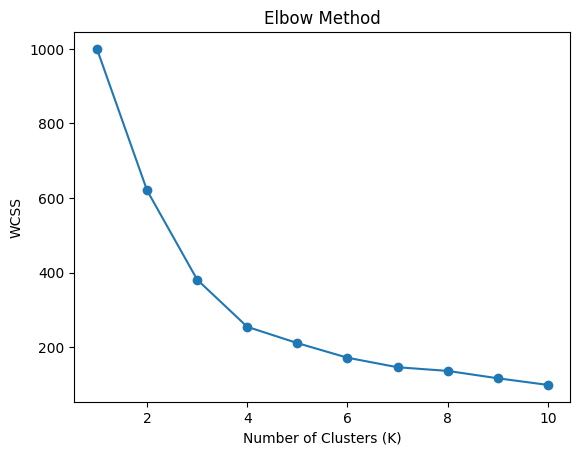

     age  spending_score  cluster       cluster_name
0     56              16        0     Old Low Income
1     69              61        1    Old High Income
2     46              64        1    Old High Income
3     32              63        2  Young High Income
4     60              69        1    Old High Income
..   ...             ...      ...                ...
495   65              84        1    Old High Income
496   42              25        0     Old Low Income
497   57              68        1    Old High Income
498   62              10        0     Old Low Income
499   18              67        2  Young High Income

[500 rows x 4 columns]
cluster
1    140
0    136
3    115
2    109
Name: count, dtype: int64


In [33]:

import matplotlib.pyplot as plt
wcss = []


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

df['cluster_name'] = df['cluster'].map(cluster_names)
print(df)

print(df['cluster'].value_counts())


In [34]:
new_customer = [[56, 16]] 

new_customer_scaled = scaler.transform(new_customer)

predicted_cluster = kmeans.predict(new_customer_scaled)

print("Predicted cluster:", predicted_cluster)

Predicted cluster: [9]


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
